In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [3]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

train.drop(columns=['1 КЗ Код', 'Время отправления фактическое', 'Время прибытия фактическое'], inplace=True)

In [4]:
def to_datetime(t):
    try:
        return pd.to_datetime(t)
    except:
        print(t)
        return None

In [5]:
train.head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время прибытия по расписанию,Задержка отправления в минутах
0,2018-05-23 00:00:00,888,SVO,MXP,226,2018-05-23 19:55:00,2018-05-23 23:25:00,0.0
1,2016-09-06 00:00:00,433,KUF,SVO,131,2016-09-06 09:20:00,2016-09-06 11:00:00,0.0
2,2018-03-03 00:00:00,551,KIV,SVO,163,2018-03-03 02:40:00,2018-03-03 05:40:00,0.0
3,2017-12-10 00:00:00,269,RTW,SVO,15,2017-12-10 12:20:00,2017-12-10 13:55:00,0.0
4,2018-05-13 00:00:00,915,CDG,SVO,207,2018-05-13 00:30:00,2018-05-13 04:00:00,0.0


In [6]:
target = 'Задержка отправления в минутах'

print(train.shape, test.shape)
train.describe()

(472859, 8) (202654, 8)


,Рейс,Номер ВС,Задержка отправления в минутах
count,472859.000000,472859.000000,472859.000000
mean,564.237071,153.848227,9.916381
std,345.260613,79.595077,45.089660
min,0.000000,0.000000,0.000000
25%,255.000000,87.000000,0.000000
50%,561.000000,163.000000,0.000000
75%,846.000000,226.000000,5.000000
max,1420.000000,279.000000,1428.000000


In [7]:
def plot_nans(data):
    vc = data.isna().sum() / data.shape[0] * 100
    vc = vc.sort_values()
    plt.figure(figsize=(4, 0.25 * len(vc)))
    plt.barh(vc.index.values, vc.values)
    plt.grid(True)
    plt.xlabel('NaN %')

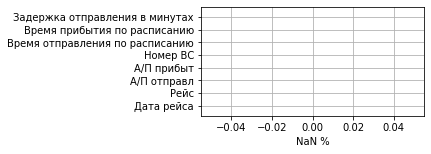

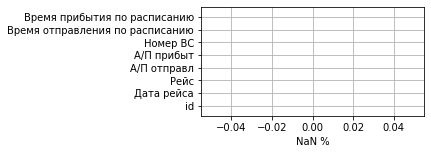

In [8]:
plot_nans(train)
plot_nans(test)

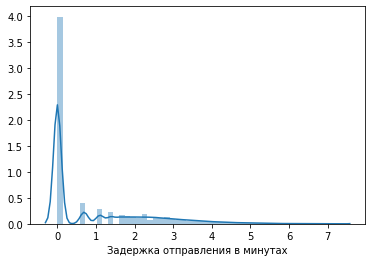

In [9]:
sns.distplot(train[target].map(np.log1p))

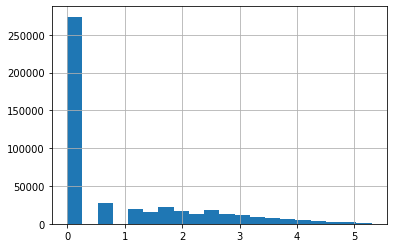

In [10]:
train[train[target] < 200][target].map(np.log1p).hist(bins=20)

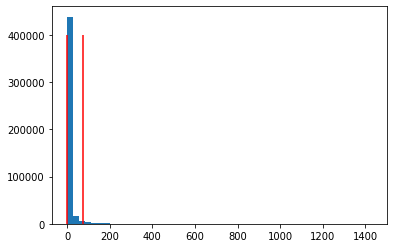

In [11]:
q_5 = train[target].quantile(1 - 0.975)
q_95 = train[target].quantile(0.975)

plt.hist(train[target].values, bins=50)
plt.vlines(q_5, color='red', ymin=0, ymax=400000)
plt.vlines(q_95, color='red', ymin=0, ymax=400000)

In [12]:
# train = train[train[target] < 200]

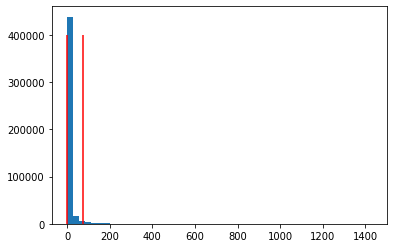

In [13]:
q_5 = train[target].quantile(1 - 0.975)
q_95 = train[target].quantile(0.975)

plt.hist(train[target].values, bins=50)
plt.vlines(q_5, color='red', ymin=0, ymax=400000)
plt.vlines(q_95, color='red', ymin=0, ymax=400000)

## Dates

In [14]:
date_features = []
date_prefixes = ['дата', 'время']

for feature in train.columns:
    for prefix in date_prefixes:
        if prefix in feature.lower():
            date_features.append(feature)
            
date_features

['Дата рейса',
 'Время отправления по расписанию',
 'Время прибытия по расписанию']

In [15]:
train = pd.read_csv('train_new.csv', sep='\t')
test = pd.read_csv('test_new.csv', sep='\t')

In [16]:
for feature in tqdm(date_features):
    train[feature] = train[feature].map(to_datetime)
    test[feature] = test[feature].map(to_datetime)

100%|██████████| 3/3 [03:30<00:00, 70.02s/it]


In [17]:
train[date_features].isna().sum()

Дата рейса                         0
Время отправления по расписанию    0
Время прибытия по расписанию       0
dtype: int64

In [19]:
train[date_features[0]].min(), test[date_features[0]].min(), train[date_features[0]].max(), test[date_features[0]].max()

(Timestamp('2015-10-27 00:00:00'),
 Timestamp('2015-10-27 00:00:00'),
 Timestamp('2018-08-31 00:00:00'),
 Timestamp('2018-08-31 00:00:00'))

In [20]:
train.head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время прибытия по расписанию,Задержка отправления в минутах,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay
0,2018-05-23,888,SVO,MXP,226,2018-05-23 19:55:00,2018-05-23 23:25:00,0.0,84,20,92,0.0
1,2016-09-06,433,KUF,SVO,131,2016-09-06 09:20:00,2016-09-06 11:00:00,0.0,72,18,12,0.0
2,2018-03-03,551,KIV,SVO,163,2018-03-03 02:40:00,2018-03-03 05:40:00,0.0,36,12,12,0.0
3,2017-12-10,269,RTW,SVO,15,2017-12-10 12:20:00,2017-12-10 13:55:00,0.0,147,36,30,0.0
4,2018-05-13,915,CDG,SVO,207,2018-05-13 00:30:00,2018-05-13 04:00:00,0.0,76,20,52,0.0


In [21]:
year_mapper = {
    2015: 1,
    2016: 2,
    2017: 3,
    2018: 4
}

def date2week(date):
    return date.week * year_mapper[date.year]

def date2month(date):
    return date.month * year_mapper[date.year]

def date2day(date):
    return date.day * year_mapper[date.year]

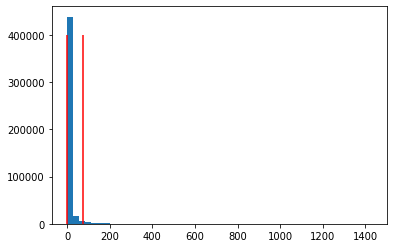

In [22]:
train.dropna(subset=['Дата рейса'], inplace=True)
q_5 = train[target].quantile(1 - 0.975)
q_95 = train[target].quantile(0.975)

plt.hist(train[target].values, bins=50)
plt.vlines(q_5, color='red', ymin=0, ymax=400000)
plt.vlines(q_95, color='red', ymin=0, ymax=400000)

In [23]:
train['fly_race_week_number'] = train['Дата рейса'].map(date2week)
test['fly_race_week_number'] = test['Дата рейса'].map(date2week)

train['fly_race_month_number'] = train['Дата рейса'].map(date2month)
test['fly_race_month_number'] = test['Дата рейса'].map(date2month)

train['fly_race_day'] = train['Дата рейса'].map(date2day)
test['fly_race_day'] = test['Дата рейса'].map(date2day)

In [24]:
for race in tqdm(train['Рейс'].unique()):
    race_data = train[train['Рейс'] == race]
    race_data = race_data.sort_values('Дата рейса')
    delay_prev = race_data[target].shift()
    delay_future = race_data[target].shift(-1)
    delay_prev.fillna(0, inplace=True)
    delay_future.fillna(0, inplace=True)
    dalay_mean = (delay_prev + delay_future) / 2
    train.set_value(race_data.index, 'nearest_fly_delay', dalay_mean.values)

100%|██████████| 1265/1265 [00:08<00:00, 143.07it/s]


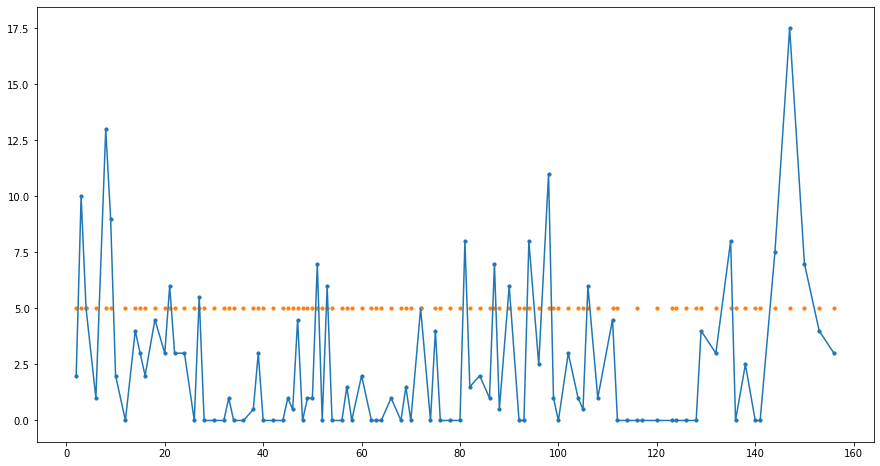

In [25]:
test[target] = -100
plot_features = train.columns.tolist()
all_data = pd.concat([train[plot_features], test[plot_features]], axis=0, ignore_index=True)

plt.figure(figsize=(15, 8))

for race in all_data['Рейс'].unique()[:1]:
    race_data = all_data[all_data['Рейс'] == race]
    race_data = race_data.sort_values('Дата рейса')
    race_data_test = race_data[race_data[target] == -100]
    race_data_train = race_data[race_data[target] >= 0]
    race_data_agg = race_data_train.groupby('fly_race_week_number', as_index=False).agg({target: np.median})
    race_data_agg_test = race_data_test.groupby('fly_race_week_number', as_index=False).agg({target: np.median})
    plt.plot(race_data_agg['fly_race_week_number'].values, race_data_agg[target].values)
    plt.scatter(race_data_agg['fly_race_week_number'].values, race_data_agg[target].values, s=10)
    race_data_agg_test[target] = 5
    plt.scatter(race_data_agg_test['fly_race_week_number'].values, race_data_agg_test[target].values, s=10)    

## Средняя задержка по дням недели и по месяцам

Text(0.5, 1.0, 'by month')

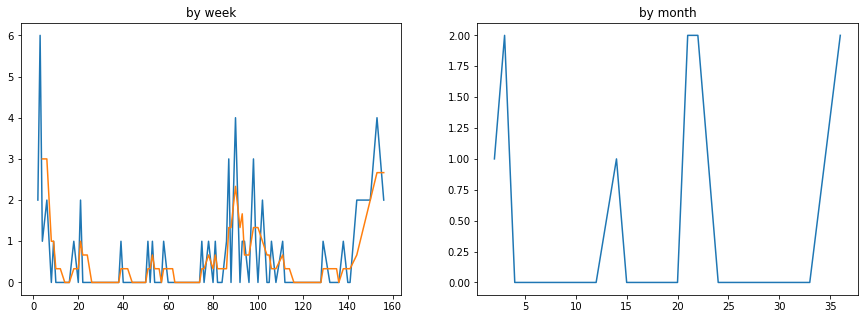

In [26]:
plot_week = train.groupby('fly_race_week_number', as_index=False).agg({target: np.median})
plot_month = train.groupby('fly_race_month_number', as_index=False).agg({target: np.median})

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(plot_week['fly_race_week_number'].values, plot_week[target])
axes[0].plot(plot_week['fly_race_week_number'].values, plot_week[target].rolling(window=3).mean())
axes[1].plot(plot_month['fly_race_month_number'].values, plot_month[target])

axes[0].set_title('by week')
axes[1].set_title('by month')

Вывод: есть подобие сезонности (начало - середина - конец)
Как вариант - использовать авторегрессию (значение на прошлой итерации для недель)

In [27]:
train['race_month'] = train['Дата рейса'].map(lambda v: v.month)
test['race_month'] = test['Дата рейса'].map(lambda v: v.month)

In [28]:
train[target + '_log1p'] = train[target].map(np.log1p)
target_plot = target + '_log1p'

In [29]:
def train_test_plot(data_train, data_test, feature, kind='dist'):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title('train')
    axes[1].set_title('test')
    assert kind in ['dist', 'count']
    if kind == 'dist':
        sns.distplot(data_train[feature], ax=axes[0])
        sns.distplot(data_test[feature], ax=axes[1])
    elif kind == 'count':
        sns.countplot(data_train[feature], ax=axes[0])
        sns.countplot(data_test[feature], ax=axes[1])

In [30]:
def plot_categorical_with_quantiles(data, feature, target, q_min=0, q_max=1, figsize=None):
    quantile_min = data[feature].quantile(q_min)
    quantile_max = data[feature].quantile(q_max)
    
    data_plot = data[(data[feature] <= quantile_max) & (data[feature] >= quantile_min)]
    if figsize is not None:
        assert len(figsize) == 2
        plt.figure(figsize=figsize)
    
    sns.violinplot(x=feature, y=target, data=data_plot)

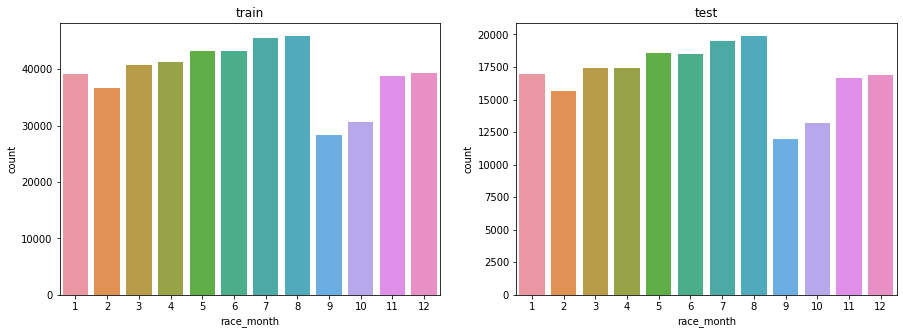

In [31]:
train_test_plot(train, test, 'race_month', kind='count')

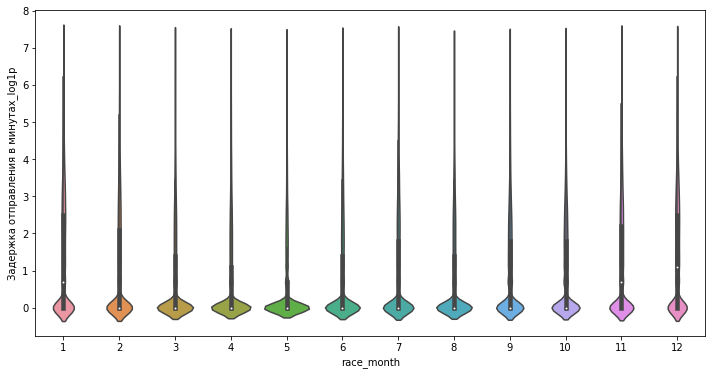

In [32]:
plot_categorical_with_quantiles(train, 'race_month', target_plot, figsize=(12, 6))

В ноябре, декабре, январе задержки чаще
К подтверждению сезонности

In [33]:
train['minutes_to_fly'] = (train['Время прибытия по расписанию'] - train['Время отправления по расписанию']).map(lambda v: v.seconds / 60)
test['minutes_to_fly'] = (test['Время прибытия по расписанию'] - test['Время отправления по расписанию']).map(lambda v: v.seconds / 60)

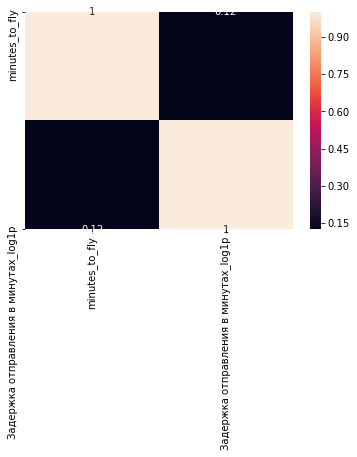

In [34]:
sns.heatmap(train[['minutes_to_fly', target_plot]].corr(method='spearman'), annot=True)

In [35]:
def date2hour(date):
    return date.hour

train['hour_away_fly'] = train['Время отправления по расписанию'].map(date2hour)
test['hour_away_fly'] = test['Время отправления по расписанию'].map(date2hour)

# sns.jointplot(x='hour_away_fly', y=target, data=train, kind='reg')

<h1>Аэропорт</h1>

In [36]:
airports = pd.read_csv('airport-codes_csv.csv', sep=',')

In [37]:
airports.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [38]:
airports['iata_code'].nunique(), train['А/П отправл'].nunique(), test['А/П отправл'].nunique()

(9080, 177, 163)

In [39]:
train['Рейс'].nunique(), test['Рейс'].nunique()

(1265, 1125)

In [40]:
len(set(train['А/П отправл'].unique().tolist()).intersection(airports['iata_code'].unique().tolist()))

177

In [41]:
len(set(train['Рейс'].unique().tolist()).intersection(test['Рейс'].unique().tolist()))

1078

In [42]:
# latitude, longtitude
airports['longtitude'] = airports['coordinates'].map(lambda v: float(v.split(',')[0]))
airports['latitude'] = airports['coordinates'].map(lambda v: float(v.split(',')[1]))
airports.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates,longtitude,latitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125",-74.933601,40.070801
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022",-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968",-151.695999,59.949200
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172",-86.770302,34.864799
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087",-91.254898,35.608700


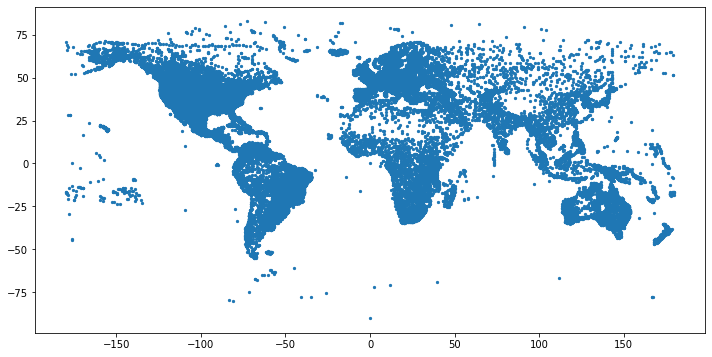

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(airports['longtitude'].values, airports['latitude'].values, s=5)

In [44]:
test.shape

(202654, 16)

In [45]:
airports['А/П прибыт'] = airports['iata_code']
airports['А/П отправл'] = airports['iata_code']
airports.drop_duplicates('А/П отправл', inplace=True)
airports.drop_duplicates('А/П прибыт', inplace=True)
train = train.merge(airports[['А/П отправл', 'longtitude', 'latitude']], on='А/П отправл', how='inner')
train = train.merge(airports[['А/П прибыт', 'longtitude', 'latitude']], on='А/П прибыт', how='inner')
test = test.merge(airports[['А/П отправл', 'longtitude', 'latitude']], on='А/П отправл', how='inner')
test = test.merge(airports[['А/П прибыт', 'longtitude', 'latitude']], on='А/П прибыт', how='inner')
train.shape, test.shape

((472859, 20), (202654, 20))

In [46]:
train.rename(columns={'longtitude_x': 'longtitude_out', 
                      'latitude_x': 'latitude_out', 
                      'longtitude_y': 'longtitude_in',
                      'latitude_y': 'latitude_in'}, inplace=True)
test.rename(columns={'longtitude_x': 'longtitude_out', 
                      'latitude_x': 'latitude_out', 
                      'longtitude_y': 'longtitude_in',
                      'latitude_y': 'latitude_in'}, inplace=True)
train.head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время прибытия по расписанию,Задержка отправления в минутах,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay,race_month,Задержка отправления в минутах_log1p,minutes_to_fly,hour_away_fly,longtitude_out,latitude_out,longtitude_in,latitude_in
0,2018-05-23,888,SVO,MXP,226,2018-05-23 19:55:00,2018-05-23 23:25:00,0.0,84,20,92,0.0,5,0.000000,210.0,19,37.4146,55.972599,8.72811,45.6306
1,2016-01-16,888,SVO,MXP,179,2016-01-16 20:40:00,2016-01-17 00:25:00,30.0,4,2,32,0.5,1,3.433987,225.0,20,37.4146,55.972599,8.72811,45.6306
2,2018-05-11,884,SVO,MXP,228,2018-05-11 08:35:00,2018-05-11 12:15:00,0.0,76,20,44,0.0,5,0.000000,220.0,8,37.4146,55.972599,8.72811,45.6306
3,2017-04-17,884,SVO,MXP,107,2017-04-17 08:35:00,2017-04-17 12:10:00,3.0,48,12,51,1.0,4,1.386294,215.0,8,37.4146,55.972599,8.72811,45.6306
4,2018-06-07,1009,SVO,MXP,142,2018-06-07 11:05:00,2018-06-07 14:40:00,0.0,92,24,28,113.0,6,0.000000,215.0,11,37.4146,55.972599,8.72811,45.6306


In [47]:
train = train.merge(airports[['А/П отправл', 'type']], on='А/П отправл', how='inner')
train = train.merge(airports[['А/П прибыт', 'type']], on='А/П прибыт', how='inner')

test = test.merge(airports[['А/П отправл', 'type']], on='А/П отправл', how='inner')
test = test.merge(airports[['А/П прибыт', 'type']], on='А/П прибыт', how='inner')

train.rename(columns={'type_x': 'type_out', 
                      'type_y': 'type_in'}, inplace=True)
test.rename(columns={'type_x': 'type_out', 
                      'type_y': 'type_in'}, inplace=True)
print(test.shape)
train.head()

(202654, 22)


,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время прибытия по расписанию,Задержка отправления в минутах,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay,race_month,Задержка отправления в минутах_log1p,minutes_to_fly,hour_away_fly,longtitude_out,latitude_out,longtitude_in,latitude_in,type_out,type_in
0,2018-05-23,888,SVO,MXP,226,2018-05-23 19:55:00,2018-05-23 23:25:00,0.0,84,20,92,0.0,5,0.000000,210.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport
1,2016-01-16,888,SVO,MXP,179,2016-01-16 20:40:00,2016-01-17 00:25:00,30.0,4,2,32,0.5,1,3.433987,225.0,20,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport
2,2018-05-11,884,SVO,MXP,228,2018-05-11 08:35:00,2018-05-11 12:15:00,0.0,76,20,44,0.0,5,0.000000,220.0,8,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport
3,2017-04-17,884,SVO,MXP,107,2017-04-17 08:35:00,2017-04-17 12:10:00,3.0,48,12,51,1.0,4,1.386294,215.0,8,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport
4,2018-06-07,1009,SVO,MXP,142,2018-06-07 11:05:00,2018-06-07 14:40:00,0.0,92,24,28,113.0,6,0.000000,215.0,11,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport


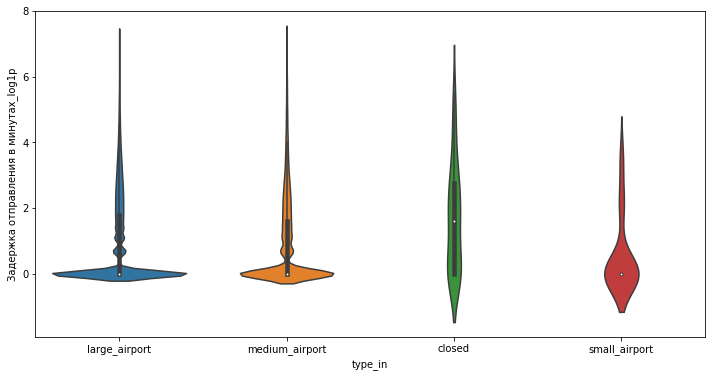

In [48]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='type_in', y=target_plot, data=train)

In [49]:
train = train.merge(airports[['А/П отправл', 'elevation_ft']], on='А/П отправл', how='inner')
train = train.merge(airports[['А/П прибыт', 'elevation_ft']], on='А/П прибыт', how='inner')
test = test.merge(airports[['А/П отправл', 'elevation_ft']], on='А/П отправл', how='inner')
test = test.merge(airports[['А/П прибыт', 'elevation_ft']], on='А/П прибыт', how='inner')

train.rename(columns={'elevation_ft_x': 'elevation_ft_out', 
                      'elevation_ft_y': 'elevation_ft_in'}, inplace=True)
test.rename(columns={'elevation_ft_x': 'elevation_ft_out', 
                      'elevation_ft_y': 'elevation_ft_in'}, inplace=True)
train.head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время прибытия по расписанию,Задержка отправления в минутах,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay,race_month,Задержка отправления в минутах_log1p,minutes_to_fly,hour_away_fly,longtitude_out,latitude_out,longtitude_in,latitude_in,type_out,type_in,elevation_ft_out,elevation_ft_in
0,2018-05-23,888,SVO,MXP,226,2018-05-23 19:55:00,2018-05-23 23:25:00,0.0,84,20,92,0.0,5,0.000000,210.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0
1,2016-01-16,888,SVO,MXP,179,2016-01-16 20:40:00,2016-01-17 00:25:00,30.0,4,2,32,0.5,1,3.433987,225.0,20,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0
2,2018-05-11,884,SVO,MXP,228,2018-05-11 08:35:00,2018-05-11 12:15:00,0.0,76,20,44,0.0,5,0.000000,220.0,8,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0
3,2017-04-17,884,SVO,MXP,107,2017-04-17 08:35:00,2017-04-17 12:10:00,3.0,48,12,51,1.0,4,1.386294,215.0,8,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0
4,2018-06-07,1009,SVO,MXP,142,2018-06-07 11:05:00,2018-06-07 14:40:00,0.0,92,24,28,113.0,6,0.000000,215.0,11,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0


In [50]:
test.shape

(202654, 24)

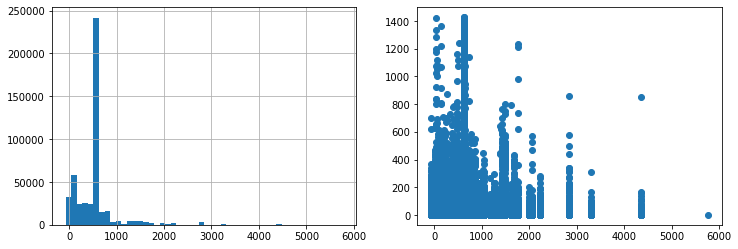

In [51]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))
train['elevation_ft_in'].hist(bins=50, ax=axes[0])
axes[1].scatter(train['elevation_ft_in'].values, train[target].values)

In [52]:
train = train.merge(airports[['А/П отправл', 'iso_country']], on='А/П отправл', how='inner')
train = train.merge(airports[['А/П прибыт', 'iso_country']], on='А/П прибыт', how='inner')
test = test.merge(airports[['А/П отправл', 'iso_country']], on='А/П отправл', how='inner')
test = test.merge(airports[['А/П прибыт', 'iso_country']], on='А/П прибыт', how='inner')

train.rename(columns={'iso_country_x': 'iso_country_out', 
                      'iso_country_y': 'iso_country_in'}, inplace=True)
test.rename(columns={'iso_country_x': 'iso_country_out', 
                      'iso_country_y': 'iso_country_in'}, inplace=True)
train.head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время прибытия по расписанию,Задержка отправления в минутах,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay,race_month,Задержка отправления в минутах_log1p,minutes_to_fly,hour_away_fly,longtitude_out,latitude_out,longtitude_in,latitude_in,type_out,type_in,elevation_ft_out,elevation_ft_in,iso_country_out,iso_country_in
0,2018-05-23,888,SVO,MXP,226,2018-05-23 19:55:00,2018-05-23 23:25:00,0.0,84,20,92,0.0,5,0.000000,210.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT
1,2016-01-16,888,SVO,MXP,179,2016-01-16 20:40:00,2016-01-17 00:25:00,30.0,4,2,32,0.5,1,3.433987,225.0,20,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT
2,2018-05-11,884,SVO,MXP,228,2018-05-11 08:35:00,2018-05-11 12:15:00,0.0,76,20,44,0.0,5,0.000000,220.0,8,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT
3,2017-04-17,884,SVO,MXP,107,2017-04-17 08:35:00,2017-04-17 12:10:00,3.0,48,12,51,1.0,4,1.386294,215.0,8,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT
4,2018-06-07,1009,SVO,MXP,142,2018-06-07 11:05:00,2018-06-07 14:40:00,0.0,92,24,28,113.0,6,0.000000,215.0,11,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT


In [53]:
test.shape

(202654, 26)

In [54]:
race_delay_mean = train.groupby('Рейс', as_index=False).agg({target: np.median}).rename(columns={target: 'race_delay_median'})
train = train.merge(race_delay_mean, on='Рейс', how='inner')
test = test.merge(race_delay_mean, on='Рейс', how='left')
print(test['race_delay_median'].isna().sum())

65


In [55]:
test['race_delay_median'].fillna(0, inplace=True)

In [56]:
race_delay_mean_week = train.groupby(['Рейс', 'fly_race_week_number'], as_index=False).agg({target: np.median}).rename(columns={target: 'race_delay_median_cur_week'})
train = train.merge(race_delay_mean_week, on=['Рейс', 'fly_race_week_number'], how='inner')
test = test.merge(race_delay_mean_week, on=['Рейс', 'fly_race_week_number'], how='left')
print(test['race_delay_median_cur_week'].isna().sum())

1691


In [57]:
race_delay_mean_week = train.groupby(['А/П отправл', 'fly_race_week_number'], as_index=False).agg({target: np.median}).rename(columns={target: 'port_out_delay_median_cur_week'})
train = train.merge(race_delay_mean_week, on=['А/П отправл', 'fly_race_week_number'], how='inner')
test = test.merge(race_delay_mean_week, on=['А/П отправл', 'fly_race_week_number'], how='left')
print(test['port_out_delay_median_cur_week'].isna().sum())

192


In [58]:
race_delay_mean_week = train.groupby(['А/П прибыт', 'fly_race_week_number'], as_index=False).agg({target: np.median}).rename(columns={target: 'port_in_delay_median_cur_week'})
train = train.merge(race_delay_mean_week, on=['А/П прибыт', 'fly_race_week_number'], how='inner')
test = test.merge(race_delay_mean_week, on=['А/П прибыт', 'fly_race_week_number'], how='left')
print(test['port_in_delay_median_cur_week'].isna().sum())

164


In [59]:
race_delay_mean_month = train.groupby(['Рейс', 'fly_race_month_number'], as_index=False).agg({target: np.median}).rename(columns={target: 'race_delay_median_cur_month'})
train = train.merge(race_delay_mean_month, on=['Рейс', 'fly_race_month_number'], how='inner')
test = test.merge(race_delay_mean_month, on=['Рейс', 'fly_race_month_number'], how='left')
print(test['race_delay_median'].isna().sum())

0


In [60]:
race_delay_mean_month = train.groupby(['А/П отправл', 'fly_race_month_number'], as_index=False).agg({target: np.median}).rename(columns={target: 'port_out_delay_median_cur_month'})
train = train.merge(race_delay_mean_month, on=['А/П отправл', 'fly_race_month_number'], how='inner')
test = test.merge(race_delay_mean_month, on=['А/П отправл', 'fly_race_month_number'], how='left')
print(test['race_delay_median'].isna().sum())

0


In [61]:
race_delay_mean_month = train.groupby(['А/П прибыт', 'fly_race_month_number'], as_index=False).agg({target: np.median}).rename(columns={target: 'port_in_delay_median_cur_month'})
train = train.merge(race_delay_mean_month, on=['А/П прибыт', 'fly_race_month_number'], how='inner')
test = test.merge(race_delay_mean_month, on=['А/П прибыт', 'fly_race_month_number'], how='left')
print(test['race_delay_median'].isna().sum())

0


In [62]:
test.fillna(0, inplace=True)

In [63]:
def set_autoreg_features(data, target, cat_feature, time_feature, value_feature):
    all_dfs = []
    for race in tqdm(data[cat_feature].unique()):
        race_data = data[data[cat_feature] == race][[cat_feature, time_feature, target]]
        race_data = race_data.sort_values(time_feature)
        race_data_agg = race_data.groupby([cat_feature, time_feature], as_index=False).agg({target: np.median})
        dalay_prev = race_data_agg[target].shift()
        dalay_prev.fillna(0, inplace=True)
        race_data_agg[value_feature] = dalay_prev
        all_dfs.append(race_data_agg)
    return pd.concat(all_dfs, axis=0, ignore_index=True)

auto_reg_df = set_autoreg_features(train, target, 'Рейс', 'fly_race_month_number', 'race_delay_prev')

100%|██████████| 1265/1265 [00:08<00:00, 150.17it/s]


In [64]:
train = train.merge(auto_reg_df[['Рейс', 'fly_race_month_number', 'race_delay_prev']], on=['Рейс', 'fly_race_month_number'], how='left')
test = test.merge(auto_reg_df[['Рейс', 'fly_race_month_number', 'race_delay_prev']], on=['Рейс', 'fly_race_month_number'], how='left')
train['race_delay_prev'].isna().sum(), test['race_delay_prev'].isna().sum()

(0, 291)

In [65]:
test['race_delay_prev'].fillna(0, inplace=True)

In [66]:
train.head()

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время прибытия по расписанию,Задержка отправления в минутах,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay,race_month,Задержка отправления в минутах_log1p,minutes_to_fly,hour_away_fly,longtitude_out,latitude_out,longtitude_in,latitude_in,type_out,type_in,elevation_ft_out,elevation_ft_in,iso_country_out,iso_country_in,race_delay_median,race_delay_median_cur_week,port_out_delay_median_cur_week,port_in_delay_median_cur_week,race_delay_median_cur_month,port_out_delay_median_cur_month,port_in_delay_median_cur_month,race_delay_prev
0,2018-05-23,888,SVO,MXP,226,2018-05-23 19:55:00,2018-05-23 23:25:00,0.0,84,20,92,0.0,5,0.000000,210.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2018-05-26,888,SVO,MXP,232,2018-05-26 19:55:00,2018-05-26 23:25:00,0.0,84,20,104,0.0,5,0.000000,210.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
2,2016-10-22,888,SVO,MXP,226,2016-10-22 19:50:00,2016-10-22 23:25:00,0.0,84,20,44,16.0,10,0.000000,215.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
3,2016-10-21,888,SVO,MXP,64,2016-10-21 19:50:00,2016-10-21 23:25:00,32.0,84,20,42,0.5,10,3.496508,215.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2016-10-23,888,SVO,MXP,207,2016-10-23 19:50:00,2016-10-23 23:25:00,0.0,84,20,46,0.0,10,0.000000,215.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0


In [67]:
train.head(1)

,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время прибытия по расписанию,Задержка отправления в минутах,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay,race_month,Задержка отправления в минутах_log1p,minutes_to_fly,hour_away_fly,longtitude_out,latitude_out,longtitude_in,latitude_in,type_out,type_in,elevation_ft_out,elevation_ft_in,iso_country_out,iso_country_in,race_delay_median,race_delay_median_cur_week,port_out_delay_median_cur_week,port_in_delay_median_cur_week,race_delay_median_cur_month,port_out_delay_median_cur_month,port_in_delay_median_cur_month,race_delay_prev
0,2018-05-23,888,SVO,MXP,226,2018-05-23 19:55:00,2018-05-23 23:25:00,0.0,84,20,92,0.0,5,0.0,210.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0


In [68]:
test.head(1)

,id,Дата рейса,Рейс,А/П отправл,А/П прибыт,Номер ВС,Время отправления по расписанию,Время прибытия по расписанию,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay,Задержка отправления в минутах,race_month,minutes_to_fly,hour_away_fly,longtitude_out,latitude_out,longtitude_in,latitude_in,type_out,type_in,elevation_ft_out,elevation_ft_in,iso_country_out,iso_country_in,race_delay_median,race_delay_median_cur_week,port_out_delay_median_cur_week,port_in_delay_median_cur_week,race_delay_median_cur_month,port_out_delay_median_cur_month,port_in_delay_median_cur_month,race_delay_prev
0,0,2018-03-22,1191,SVO,LED,82,2018-03-22 20:20:00,2018-03-22 21:50:00,48,12,88,0.0,-100,3,90.0,20,37.4146,55.972599,30.262501,59.800301,large_airport,large_airport,622.0,78.0,RU,RU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


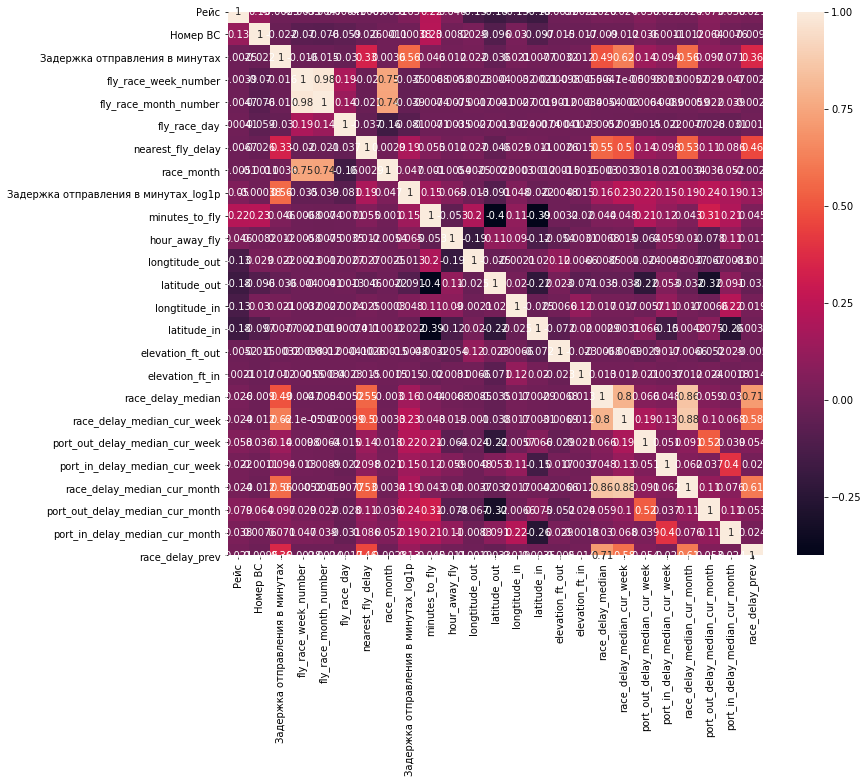

In [69]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True)

In [70]:
from copy import copy
work_features = copy(train.columns.tolist())
work_features.remove(target)
work_features.remove(target_plot)
for feature in date_features:
    work_features.remove(feature)
for feature in work_features:
    if 'cur_week' in feature:
        work_features.remove(feature)
train[work_features].head()

,Рейс,А/П отправл,А/П прибыт,Номер ВС,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay,race_month,minutes_to_fly,hour_away_fly,longtitude_out,latitude_out,longtitude_in,latitude_in,type_out,type_in,elevation_ft_out,elevation_ft_in,iso_country_out,iso_country_in,race_delay_median,port_out_delay_median_cur_week,race_delay_median_cur_month,port_out_delay_median_cur_month,port_in_delay_median_cur_month,race_delay_prev
0,888,SVO,MXP,226,84,20,92,0.0,5,210.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,0.0,0.0,0.0,0.0,3.0
1,888,SVO,MXP,232,84,20,104,0.0,5,210.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,0.0,0.0,0.0,0.0,3.0
2,888,SVO,MXP,226,84,20,44,16.0,10,215.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,0.0,0.0,0.0,0.0,3.0
3,888,SVO,MXP,64,84,20,42,0.5,10,215.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,0.0,0.0,0.0,0.0,3.0
4,888,SVO,MXP,207,84,20,46,0.0,10,215.0,19,37.4146,55.972599,8.72811,45.6306,large_airport,large_airport,622.0,768.0,RU,IT,1.0,0.0,0.0,0.0,0.0,3.0


In [71]:
train['Рейс'] = train['Рейс'].astype(str)
test['Рейс'] = test['Рейс'].astype(str)
train['Номер ВС'] = train['Номер ВС'].astype(str)
test['Номер ВС'] = test['Номер ВС'].astype(str)
cat_features = train[work_features].dtypes[train[work_features].dtypes == 'object'].index.values.tolist()
cat_features

['Рейс',
 'А/П отправл',
 'А/П прибыт',
 'Номер ВС',
 'type_out',
 'type_in',
 'iso_country_out',
 'iso_country_in']

In [72]:
work_features

['Рейс',
 'А/П отправл',
 'А/П прибыт',
 'Номер ВС',
 'fly_race_week_number',
 'fly_race_month_number',
 'fly_race_day',
 'nearest_fly_delay',
 'race_month',
 'minutes_to_fly',
 'hour_away_fly',
 'longtitude_out',
 'latitude_out',
 'longtitude_in',
 'latitude_in',
 'type_out',
 'type_in',
 'elevation_ft_out',
 'elevation_ft_in',
 'iso_country_out',
 'iso_country_in',
 'race_delay_median',
 'port_out_delay_median_cur_week',
 'race_delay_median_cur_month',
 'port_out_delay_median_cur_month',
 'port_in_delay_median_cur_month',
 'race_delay_prev']

In [73]:
from sklearn.preprocessing import OneHotEncoder
from copy import copy

print(train.shape, test.shape)
one_hot_features = ['А/П отправл', 'А/П прибыт', 'Номер ВС', 'type_out', 'type_in', 'iso_country_out', 'iso_country_in']
encoder = OneHotEncoder(handle_unknown='ignore')
for feature in one_hot_features:
    encoder.fit(train[[feature]])
    train_transformed = encoder.transform(train[[feature]]).todense()
    test_transformed = encoder.transform(test[[feature]]).todense()
    columns = encoder.get_feature_names() + '_' + feature
    train_transformed = pd.DataFrame(train_transformed, columns=columns)
    test_transformed = pd.DataFrame(test_transformed, columns=columns)
    train = pd.concat([train, train_transformed], axis=1)
    test = pd.concat([test, test_transformed], axis=1)
    print(train.shape, test.shape)

(472859, 34) (202654, 34)
(472859, 211) (202654, 211)
(472859, 385) (202654, 385)
(472859, 659) (202654, 659)
(472859, 663) (202654, 663)
(472859, 667) (202654, 667)
(472859, 725) (202654, 725)
(472859, 782) (202654, 782)


In [74]:
work_features = copy(train.columns.tolist())
work_features.remove(target)
work_features.remove(target_plot)
for feature in date_features:
    work_features.remove(feature)
for feature in one_hot_features:
    work_features.remove(feature)
for feature in work_features:
    if 'cur_week' in feature:
        work_features.remove(feature)
work_features.remove('Рейс')
train[work_features].head()

,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay,race_month,minutes_to_fly,hour_away_fly,longtitude_out,latitude_out,longtitude_in,latitude_in,elevation_ft_out,elevation_ft_in,race_delay_median,port_out_delay_median_cur_week,race_delay_median_cur_month,port_out_delay_median_cur_month,port_in_delay_median_cur_month,race_delay_prev,x0_AAQ_А/П отправл,x0_ABA_А/П отправл,x0_AER_А/П отправл,x0_AGP_А/П отправл,x0_AKX_А/П отправл,x0_ALA_А/П отправл,x0_ALC_А/П отправл,x0_AMS_А/П отправл,x0_ARH_А/П отправл,x0_ARN_А/П отправл,x0_ASF_А/П отправл,x0_ATH_А/П отправл,x0_AYT_А/П отправл,x0_BAX_А/П отправл,x0_BCN_А/П отправл,x0_BEG_А/П отправл,x0_BEY_А/П отправл,x0_BKK_А/П отправл,x0_BLQ_А/П отправл,x0_BOJ_А/П отправл,x0_BRU_А/П отправл,x0_BSL_А/П отправл,x0_BUD_А/П отправл,x0_CAI_А/П отправл,x0_CAN_А/П отправл,x0_CDG_А/П отправл,x0_CEE_А/П отправл,x0_CEK_А/П отправл,x0_CGN_А/П отправл,x0_CIT_А/П отправл,x0_CPH_А/П отправл,x0_DEL_А/П отправл,x0_DOH_А/П отправл,x0_DRS_А/П отправл,x0_DUS_А/П отправл,x0_DXB_А/П отправл,x0_EGO_А/П отправл,x0_EIN_А/П отправл,x0_ERZ_А/П отправл,x0_EVN_А/П отправл,x0_FCO_А/П отправл,x0_FRA_А/П отправл,x0_FRU_А/П отправл,x0_GDX_А/П отправл,x0_GDZ_А/П отправл,x0_GIG_А/П отправл,x0_GNB_А/П отправл,x0_GOJ_А/П отправл,x0_GRV_А/П отправл,x0_GUW_А/П отправл,x0_GVA_А/П отправл,x0_GYD_А/П отправл,x0_HAJ_А/П отправл,x0_HAM_А/П отправл,x0_HAN_А/П отправл,x0_HAV_А/П отправл,x0_HEL_А/П отправл,x0_HER_А/П отправл,x0_HKG_А/П отправл,x0_HKT_А/П отправл,x0_HMA_А/П отправл,x0_IAD_А/П отправл,x0_IAR_А/П отправл,x0_ICN_А/П отправл,x0_IKA_А/П отправл,x0_IKT_А/П отправл,x0_IST_А/П отправл,x0_JFK_А/П отправл,x0_KEJ_А/П отправл,x0_KGD_А/П отправл,x0_KGF_А/П отправл,x0_KHV_А/П отправл,x0_KIV_А/П отправл,x0_KJA_А/П отправл,x0_KRR_А/П отправл,x0_KSC_А/П отправл,x0_KSN_А/П отправл,x0_KUF_А/П отправл,x0_KUN_А/П отправл,x0_KZN_А/П отправл,x0_KZO_А/П отправл,x0_LAX_А/П отправл,x0_LCA_А/П отправл,x0_LED_А/П отправл,x0_LGW_А/П отправл,x0_LHR_А/П отправл,x0_LIS_А/П отправл,x0_LJU_А/П отправл,x0_LTN_А/П отправл,x0_LYS_А/П отправл,x0_MAD_А/П отправл,x0_MAN_А/П отправл,x0_MCX_А/П отправл,x0_MIA_А/П отправл,x0_MLE_А/П отправл,x0_MMK_А/П отправл,x0_MQF_А/П отправл,x0_MRV_А/П отправл,x0_MSQ_А/П отправл,x0_MUC_А/П отправл,x0_MXP_А/П отправл,x0_NAP_А/П отправл,x0_NBC_А/П отправл,x0_NCE_А/П отправл,x0_NJC_А/П отправл,x0_NOZ_А/П отправл,x0_NRT_А/П отправл,x0_NUE_А/П отправл,x0_NUX_А/П отправл,x0_NVI_А/П отправл,x0_OMS_А/П отправл,x0_OSL_А/П отправл,x0_OSR_А/П отправл,x0_OTP_А/П отправл,x0_OVB_А/П отправл,x0_PED_А/П отправл,x0_PEE_А/П отправл,x0_PEK_А/П отправл,x0_PKC_А/П отправл,x0_PRG_А/П отправл,x0_PVG_А/П отправл,x0_REN_А/П отправл,x0_RGK_А/П отправл,x0_RIX_А/П отправл,x0_ROV_А/П отправл,x0_RTW_А/П отправл,x0_RVI_А/П отправл,x0_SAW_А/П отправл,x0_SBT_А/П отправл,x0_SCO_А/П отправл,x0_SCW_А/П отправл,x0_SGC_А/П отправл,x0_SGN_А/П отправл,x0_SIP_А/П отправл,x0_SKD_А/П отправл,x0_SKG_А/П отправл,x0_SKX_А/П отправл,x0_SLY_А/П отправл,x0_SOF_А/П отправл,x0_SPU_А/П отправл,x0_STR_А/П отправл,x0_STW_А/П отправл,x0_SVL_А/П отправл,x0_SVO_А/П отправл,x0_SVX_А/П отправл,x0_SXF_А/П отправл,x0_SZG_А/П отправл,x0_TAS_А/П отправл,x0_TBS_А/П отправл,x0_TFS_А/П отправл,x0_TGD_А/П отправл,x0_TIV_А/П отправл,x0_TJM_А/П отправл,x0_TLL_А/П отправл,x0_TLV_А/П отправл,x0_TOF_А/П отправл,x0_TRN_А/П отправл,x0_TSE_А/П отправл,x0_UFA_А/П отправл,x0_ULN_А/П отправл,x0_UUS_А/П отправл,x0_VCE_А/П отправл,x0_VIE_А/П отправл,x0_VIT_А/П отправл,x0_VKO_А/П отправл,x0_VLC_А/П отправл,x0_VNO_А/П отправл,x0_VOG_А/П отправл,x0_VOZ_А/П отправл,x0_VRN_А/П отправл,x0_VST_А/П отправл,x0_VVO_А/П отправл,x0_WAW_А/П отправл,x0_YKS_А/П отправл,x0_ZAG_А/П отправл,x0_ZIA_А/П отправл,x0_ZRH_А/П отправл,x0_AAQ_А/П прибыт,x0_ABA_А/П прибыт,x0_AER_А/П прибыт,x0_AGP_А/П прибыт,x0_AKX_А/П прибыт,x0_ALA_А/П прибыт,x0_ALC_А/П прибыт,x0_AMS_А/П прибыт,x0_ARH_А/П прибыт,x0_ARN_А/П прибыт,x0_ASF_А/П прибыт,x0_ATH_А/П прибыт,x0_AYT_А/П прибыт,x0_BAX_А/П прибыт,x0_BCN_А/П прибыт,x0_BEG_А/

In [75]:
numeric_features = [feature for feature in work_features if not 'x0' in feature]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for feature in tqdm(numeric_features):
    scaler.fit(train[[feature]])
    train[feature] = scaler.transform(train[[feature]])
    test[feature] = scaler.transform(test[[feature]])

100%|██████████| 19/19 [00:21<00:00,  1.11s/it]


In [76]:
train[work_features].head(1)

,fly_race_week_number,fly_race_month_number,fly_race_day,nearest_fly_delay,race_month,minutes_to_fly,hour_away_fly,longtitude_out,latitude_out,longtitude_in,latitude_in,elevation_ft_out,elevation_ft_in,race_delay_median,port_out_delay_median_cur_week,race_delay_median_cur_month,port_out_delay_median_cur_month,port_in_delay_median_cur_month,race_delay_prev,x0_AAQ_А/П отправл,x0_ABA_А/П отправл,x0_AER_А/П отправл,x0_AGP_А/П отправл,x0_AKX_А/П отправл,x0_ALA_А/П отправл,x0_ALC_А/П отправл,x0_AMS_А/П отправл,x0_ARH_А/П отправл,x0_ARN_А/П отправл,x0_ASF_А/П отправл,x0_ATH_А/П отправл,x0_AYT_А/П отправл,x0_BAX_А/П отправл,x0_BCN_А/П отправл,x0_BEG_А/П отправл,x0_BEY_А/П отправл,x0_BKK_А/П отправл,x0_BLQ_А/П отправл,x0_BOJ_А/П отправл,x0_BRU_А/П отправл,x0_BSL_А/П отправл,x0_BUD_А/П отправл,x0_CAI_А/П отправл,x0_CAN_А/П отправл,x0_CDG_А/П отправл,x0_CEE_А/П отправл,x0_CEK_А/П отправл,x0_CGN_А/П отправл,x0_CIT_А/П отправл,x0_CPH_А/П отправл,x0_DEL_А/П отправл,x0_DOH_А/П отправл,x0_DRS_А/П отправл,x0_DUS_А/П отправл,x0_DXB_А/П отправл,x0_EGO_А/П отправл,x0_EIN_А/П отправл,x0_ERZ_А/П отправл,x0_EVN_А/П отправл,x0_FCO_А/П отправл,x0_FRA_А/П отправл,x0_FRU_А/П отправл,x0_GDX_А/П отправл,x0_GDZ_А/П отправл,x0_GIG_А/П отправл,x0_GNB_А/П отправл,x0_GOJ_А/П отправл,x0_GRV_А/П отправл,x0_GUW_А/П отправл,x0_GVA_А/П отправл,x0_GYD_А/П отправл,x0_HAJ_А/П отправл,x0_HAM_А/П отправл,x0_HAN_А/П отправл,x0_HAV_А/П отправл,x0_HEL_А/П отправл,x0_HER_А/П отправл,x0_HKG_А/П отправл,x0_HKT_А/П отправл,x0_HMA_А/П отправл,x0_IAD_А/П отправл,x0_IAR_А/П отправл,x0_ICN_А/П отправл,x0_IKA_А/П отправл,x0_IKT_А/П отправл,x0_IST_А/П отправл,x0_JFK_А/П отправл,x0_KEJ_А/П отправл,x0_KGD_А/П отправл,x0_KGF_А/П отправл,x0_KHV_А/П отправл,x0_KIV_А/П отправл,x0_KJA_А/П отправл,x0_KRR_А/П отправл,x0_KSC_А/П отправл,x0_KSN_А/П отправл,x0_KUF_А/П отправл,x0_KUN_А/П отправл,x0_KZN_А/П отправл,x0_KZO_А/П отправл,x0_LAX_А/П отправл,x0_LCA_А/П отправл,x0_LED_А/П отправл,x0_LGW_А/П отправл,x0_LHR_А/П отправл,x0_LIS_А/П отправл,x0_LJU_А/П отправл,x0_LTN_А/П отправл,x0_LYS_А/П отправл,x0_MAD_А/П отправл,x0_MAN_А/П отправл,x0_MCX_А/П отправл,x0_MIA_А/П отправл,x0_MLE_А/П отправл,x0_MMK_А/П отправл,x0_MQF_А/П отправл,x0_MRV_А/П отправл,x0_MSQ_А/П отправл,x0_MUC_А/П отправл,x0_MXP_А/П отправл,x0_NAP_А/П отправл,x0_NBC_А/П отправл,x0_NCE_А/П отправл,x0_NJC_А/П отправл,x0_NOZ_А/П отправл,x0_NRT_А/П отправл,x0_NUE_А/П отправл,x0_NUX_А/П отправл,x0_NVI_А/П отправл,x0_OMS_А/П отправл,x0_OSL_А/П отправл,x0_OSR_А/П отправл,x0_OTP_А/П отправл,x0_OVB_А/П отправл,x0_PED_А/П отправл,x0_PEE_А/П отправл,x0_PEK_А/П отправл,x0_PKC_А/П отправл,x0_PRG_А/П отправл,x0_PVG_А/П отправл,x0_REN_А/П отправл,x0_RGK_А/П отправл,x0_RIX_А/П отправл,x0_ROV_А/П отправл,x0_RTW_А/П отправл,x0_RVI_А/П отправл,x0_SAW_А/П отправл,x0_SBT_А/П отправл,x0_SCO_А/П отправл,x0_SCW_А/П отправл,x0_SGC_А/П отправл,x0_SGN_А/П отправл,x0_SIP_А/П отправл,x0_SKD_А/П отправл,x0_SKG_А/П отправл,x0_SKX_А/П отправл,x0_SLY_А/П отправл,x0_SOF_А/П отправл,x0_SPU_А/П отправл,x0_STR_А/П отправл,x0_STW_А/П отправл,x0_SVL_А/П отправл,x0_SVO_А/П отправл,x0_SVX_А/П отправл,x0_SXF_А/П отправл,x0_SZG_А/П отправл,x0_TAS_А/П отправл,x0_TBS_А/П отправл,x0_TFS_А/П отправл,x0_TGD_А/П отправл,x0_TIV_А/П отправл,x0_TJM_А/П отправл,x0_TLL_А/П отправл,x0_TLV_А/П отправл,x0_TOF_А/П отправл,x0_TRN_А/П отправл,x0_TSE_А/П отправл,x0_UFA_А/П отправл,x0_ULN_А/П отправл,x0_UUS_А/П отправл,x0_VCE_А/П отправл,x0_VIE_А/П отправл,x0_VIT_А/П отправл,x0_VKO_А/П отправл,x0_VLC_А/П отправл,x0_VNO_А/П отправл,x0_VOG_А/П отправл,x0_VOZ_А/П отправл,x0_VRN_А/П отправл,x0_VST_А/П отправл,x0_VVO_А/П отправл,x0_WAW_А/П отправл,x0_YKS_А/П отправл,x0_ZAG_А/П отправл,x0_ZIA_А/П отправл,x0_ZRH_А/П отправл,x0_AAQ_А/П прибыт,x0_ABA_А/П прибыт,x0_AER_А/П прибыт,x0_AGP_А/П прибыт,x0_AKX_А/П прибыт,x0_ALA_А/П прибыт,x0_ALC_А/П прибыт,x0_AMS_А/П прибыт,x0_ARH_А/П прибыт,x0_ARN_А/П прибыт,x0_ASF_А/П прибыт,x0_ATH_А/П прибыт,x0_AYT_А/П прибыт,x0_BAX_А/П прибыт,x0_BCN_А/П прибыт,x0_BEG_А/

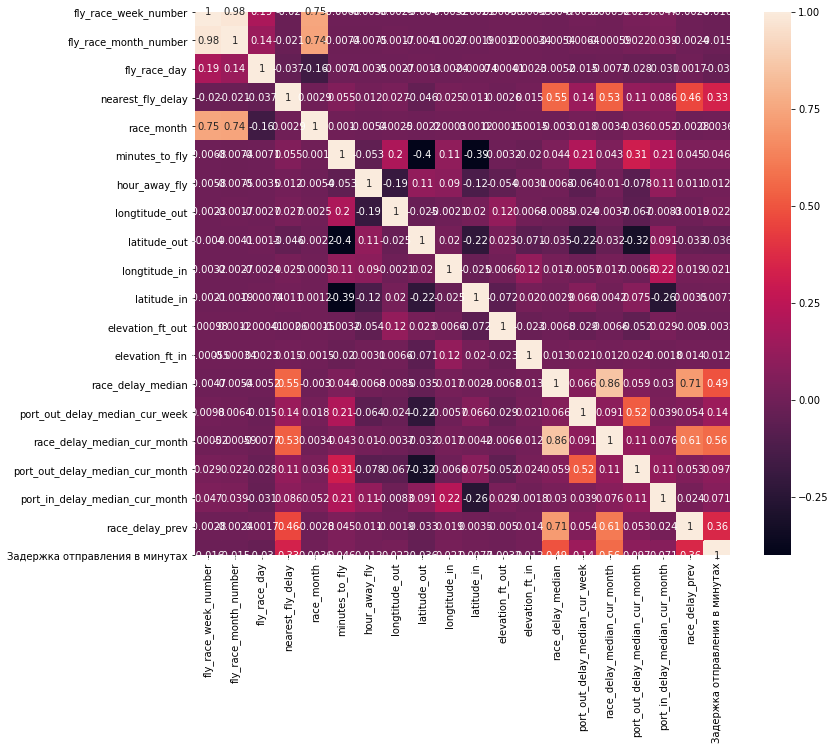

In [77]:
plt.figure(figsize=(12, 10))
sns.heatmap(train[numeric_features + [target]].corr(), annot=True)

In [78]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[work_features], train[target], shuffle=True, test_size=0.25)

In [81]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lin_reg = Lasso()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred = lin_reg.predict(X_test)
np.sqrt(mean_squared_error(y_train, y_pred_train)), np.sqrt(mean_squared_error(y_test, y_pred))

(37.2457309681607, 36.168868265435016)

In [83]:
test[target] = lin_reg.predict(test[work_features])
test[target] = test[target].map(lambda v: 0 if v < 0 else v)
test[['id', target]].to_csv('submission.csv', sep=',', index=False)